<a href="https://colab.research.google.com/github/LuisJAA00/Prolog/blob/main/LASCARASXD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch.nn as dobleN
import random
import torch.nn.parallel
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
from IPython.display import HTML
from __future__ import print_function
import torchvision.utils as vutils
import matplotlib.animation as animation
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# Set path to folder in Google Drive
path = '/content/gdrive/My Drive/celeba'
# Check the contents of the folder, the function expects folders named with the
# spected labels such as "train"
print(os.listdir(path))
random.seed(500)
torch.manual_seed(500)
# The learning rate lr:
lr = 0.005
# is there a gpu?
GPU = torch.device("cuda:0" if (torch.cuda.is_available() and 1 > 0) else "cpu")
# prepare the dataset
DataS = dset.ImageFolder(path,
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
Tamal_batch = 100
dataload = torch.utils.data.DataLoader(DataS, batch_size=Tamal_batch,
                                         shuffle=True, num_workers=4)

# Rnad wiegth, point in the multivariable loss function from wich we make the 
# net learn
def rand_weight(m):
    clss= m.__class__.__name__
    if clss.find('BatchNorm') != -1:
        dobleN.init.normal_(m.weight.data, 0.95, 0.0195)
        dobleN.init.constant_(m.bias.data, 0)
    elif clss.find('Conv') != -1:
        dobleN.init.normal_(m.weight.data, 0.0, 0.0195)

Mounted at /content/gdrive
['Train']


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class Discriminator(dobleN.Module):


    def __init__(thiis, Ngpu):
        super(Discriminator, thiis).__init__()
        thiis.Ngpu = Ngpu
        thiis.main = dobleN.Sequential(
            # 3 input channel, 4x4 kernel and 64 output channels
            dobleN.Conv2d(3, 64, 4, 2, 1, bias=False),
            dobleN.LeakyReLU(0.2, inplace=True),
            # 64 input channels, 128 output channels, a kernel size of 4x4
            dobleN.Conv2d(64, 128, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(128),
            dobleN.LeakyReLU(0.2, inplace=True),
            #  128 input channels, 256 output channels, a kernel size of 4x4
            dobleN.Conv2d(128, 256, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(256),
            dobleN.LeakyReLU(0.2, inplace=True),
            # 256 input channels, 512 output channels, a kernel size of 4x4
            dobleN.Conv2d(256, 512, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(512),
            dobleN.LeakyReLU(0.2, inplace=True),
            dobleN.Conv2d(512, 1, 4, 1, 0, bias=False),
            dobleN.Sigmoid()
        )
    def forward(thiis, input):
        return thiis.main(input)

netD = Discriminator(1).to(GPU)
netD.apply(rand_weight)




Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [ ]:
# Define the generator model
class Generator(dobleN.Module):
    def __init__(self, num_gpu):
        super(Generator, self).__init__()
        self.num_gpu = num_gpu
        self.layer1 = dobleN.Sequential(
            dobleN.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            dobleN.BatchNorm2d(512),
            dobleN.ReLU(True)
        )
        self.layer2 = dobleN.Sequential(
            dobleN.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(256),
            dobleN.ReLU(True)
        )
        self.layer3 = dobleN.Sequential(
            dobleN.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(128),
            dobleN.ReLU(True)
        )
        self.layer4 = dobleN.Sequential(
            dobleN.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            dobleN.BatchNorm2d(64),
            dobleN.ReLU(True)
        )
        self.layer5 = dobleN.Sequential(
            dobleN.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            dobleN.Tanh()
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x


netG = Generator(num_gpu=1).to(GPU)
netG.apply(rand_weight)

noise = torch.randn(64, 100, 1, 1, device=GPU)
generated_images = netG(noise)

In [ ]:
fixed_noise = torch.randn(64, 100, 1, 1, device=GPU)
# Define the binary cross-entropy loss function
bce_loss = dobleN.BCELoss()

# Define the labels for real and fake samples
real_label = 1
fake_label = 0

# Define the Adam optimizers for the generator and discriminator networks
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
optimizer_G = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, beta2))

# Define lists to keep track of the generator and discriminator losses, and generated images
num_epochs = 200
generator_losses = []
discriminator_losses = []
generated_images = []
iteration = 0

# Loop over the number of epochs
for epoch in range(num_epochs):

    # Loop over the batches in the data loader
    for batch_idx, (real_images, _) in enumerate(dataload):

        batch_size = real_images.size(0)

        # Train the discriminator with real images
        optimizer_D.zero_grad()

        real_labels = torch.full((batch_size,), real_label, device=GPU)
        real_output = netD(real_images.to(GPU)).view(-1)
        real_loss = bce_loss(real_output, real_labels.float())
        real_loss.backward()

        # Train the discriminator with fake images generated by the generator
        noise = torch.randn(batch_size, 100, 1, 1, device=GPU)
        fake_images = netG(noise)
        fake_labels = torch.full((batch_size,), fake_label, device=GPU)
        fake_output = netD(fake_images.detach()).view(-1)
        fake_loss = bce_loss(fake_output, fake_labels.float())
        fake_loss.backward()

        discriminator_loss = real_loss + fake_loss
        optimizer_D.step()

        # Train the generator to fool the discriminator
        optimizer_G.zero_grad()

        fake_labels.fill_(real_label)
        output = netD(fake_images).view(-1)
        generator_loss = bce_loss(output, fake_labels.float())
        generator_loss.backward()

        optimizer_G.step()

        # Record losses and generated images for visualization
        generator_losses.append(generator_loss.item())
        discriminator_losses.append(discriminator_loss.item())

        if iteration % 500 == 0:
            with torch.no_grad():
                generated_images_batch = netG(fixed_noise).detach().cpu()
                generated_images.append(vutils.make_grid(generated_images_batch, padding=2, normalize=True))

        iteration += 1


        if batch_idx % 50 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Batch {batch_idx}/{len(dataload)}, "
                  f"Discriminator Loss: {discriminator_loss:.4f}, Generator Loss: {generator_loss:.4f}")

print("Training finished!")



Epoch 0/200, Batch 0/38, Discriminator Loss: 0.0382, Generator Loss: 6.2062
Epoch 1/200, Batch 0/38, Discriminator Loss: 0.0268, Generator Loss: 5.9646
Epoch 2/200, Batch 0/38, Discriminator Loss: 0.0325, Generator Loss: 5.7617
Epoch 3/200, Batch 0/38, Discriminator Loss: 0.0335, Generator Loss: 5.6889
Epoch 4/200, Batch 0/38, Discriminator Loss: 0.0242, Generator Loss: 6.4062
Epoch 5/200, Batch 0/38, Discriminator Loss: 0.0242, Generator Loss: 6.5505
Epoch 6/200, Batch 0/38, Discriminator Loss: 0.0366, Generator Loss: 6.3854
Epoch 7/200, Batch 0/38, Discriminator Loss: 0.0256, Generator Loss: 6.2879
Epoch 8/200, Batch 0/38, Discriminator Loss: 0.0321, Generator Loss: 6.8609
Epoch 9/200, Batch 0/38, Discriminator Loss: 0.0220, Generator Loss: 6.3455
Epoch 10/200, Batch 0/38, Discriminator Loss: 0.0251, Generator Loss: 6.0895
Epoch 11/200, Batch 0/38, Discriminator Loss: 0.0433, Generator Loss: 7.0126
Epoch 12/200, Batch 0/38, Discriminator Loss: 0.0275, Generator Loss: 6.6762
Epoch 13/

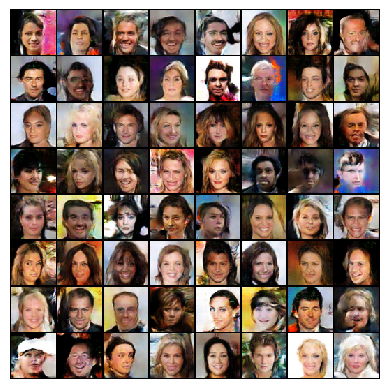

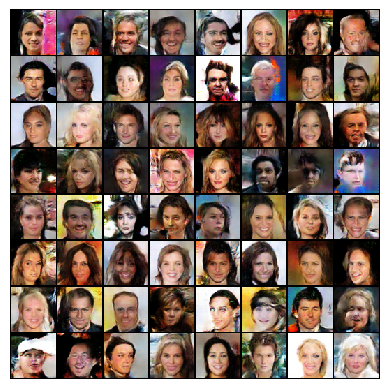

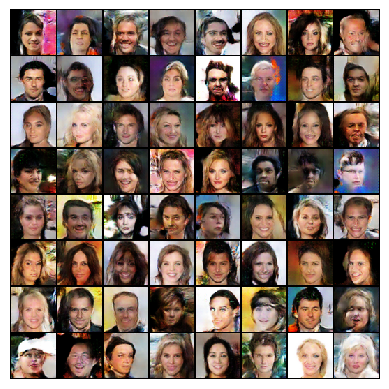

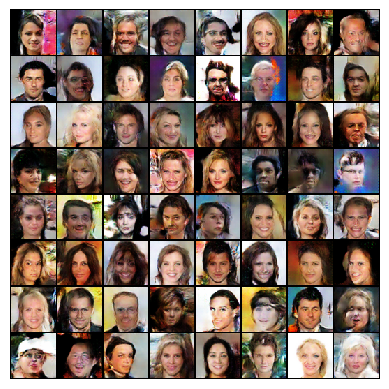

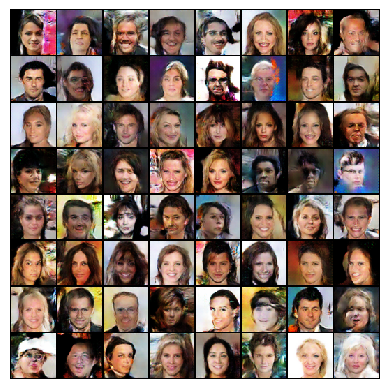

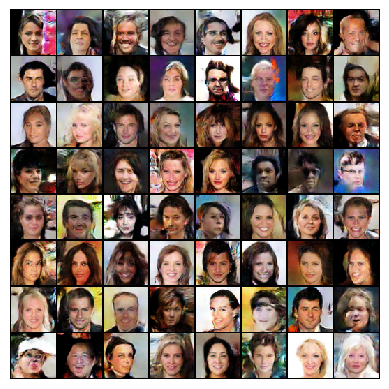

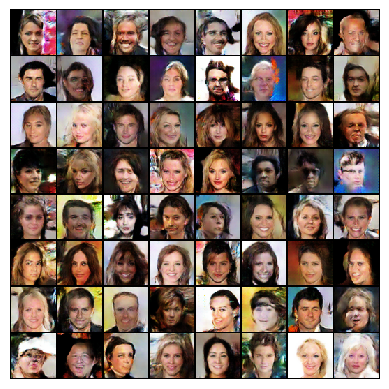

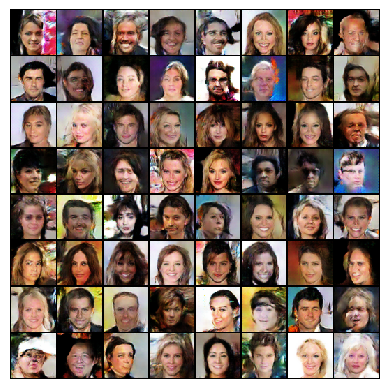

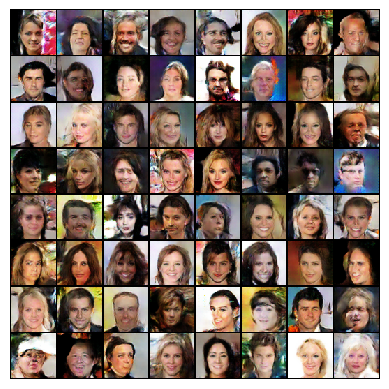

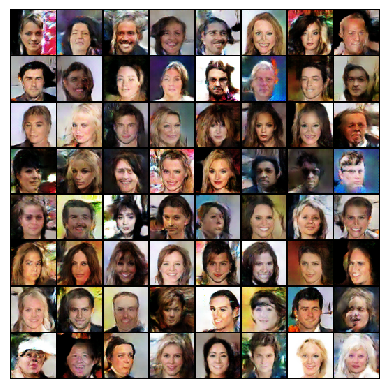

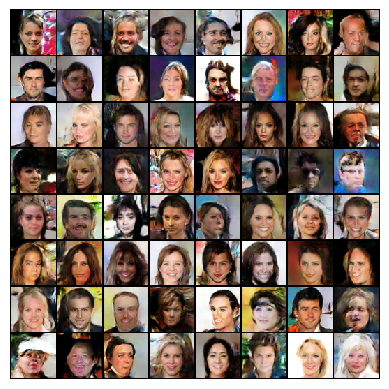

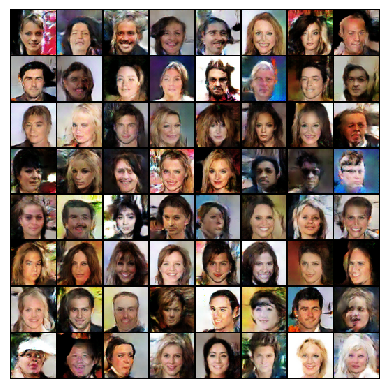

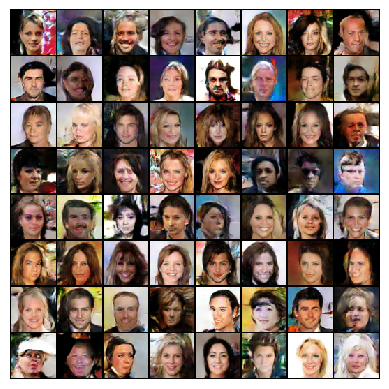

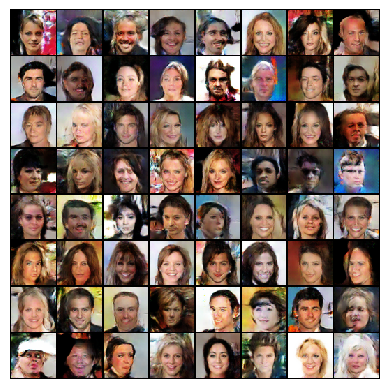

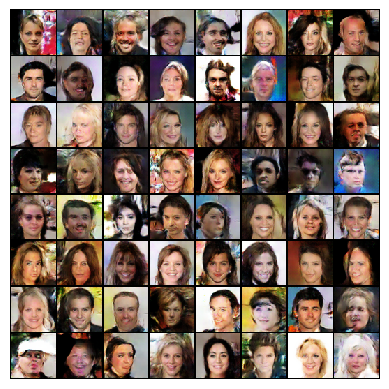

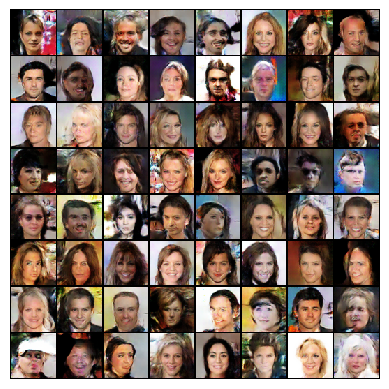

In [ ]:
for img in generated_images:
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    plt.show()